## Observations and Insights 

In [49]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_complete = pd.merge(study_results, mouse_metadata, how="outer", on=["Mouse ID"])

# Display the data table for preview
mouse_study_complete

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [2]:
# Checking the number of mice.
amount_unique_mice = len(mouse_study_complete["Mouse ID"].unique())

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_ID = mouse_study_complete[mouse_study_complete.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_ID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
861,g989,0,45.000000,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_ID = mouse_study_complete[mouse_study_complete.duplicated(["Mouse ID"])]


In [486]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_study = mouse_study_complete.drop_duplicates(subset=["Mouse ID", "Timepoint"])
cleaned_mouse_study

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_number_mice = len(cleaned_mouse_study)
cleaned_number_mice

1888

## Summary Statistics

In [ ]:
cleaned_mouse_study

In [79]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean = cleaned_mouse_study.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = cleaned_mouse_study.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = cleaned_mouse_study.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
std_dev = cleaned_mouse_study.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem = cleaned_mouse_study.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summary = ({"Mean Tumor Volume": mean, 
           "Median Tumor Volume": median, 
           "Variance Tumor Volume": variance, 
           "Standard Deviation Tumor Volume": std_dev, 
           "Standard Error Tumor Volume": sem})
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
summary_df = pd.DataFrame(summary)
summary_df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Standard Deviation Tumor Volume,Standard Error Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
df.agg(x=('A', max), y=('B', 'min'), z=('C', np.mean))

In [41]:
cleaned_mouse_study.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 0, 'Drug Regimen')

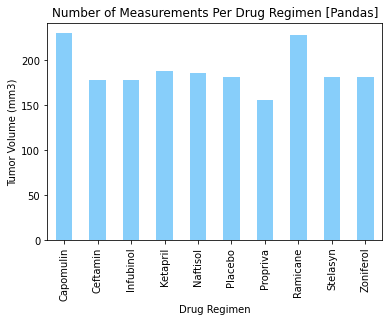

In [122]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_tumor = cleaned_mouse_study.groupby("Drug Regimen").count()["Tumor Volume (mm3)"]
drug_tumor.plot(kind="bar", facecolor="lightskyblue")
plt.title("Number of Measurements Per Drug Regimen [Pandas]")
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Drug Regimen")

Text(0, 0.5, 'Tumor Volume (mm3)')

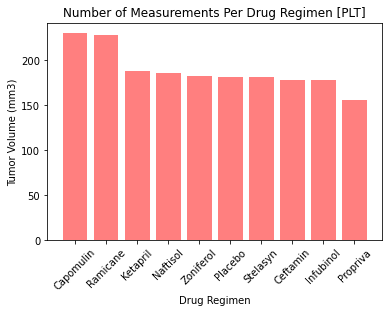

In [120]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
unique_regimen = cleaned_mouse_study["Drug Regimen"].unique()
value_measurements = cleaned_mouse_study["Drug Regimen"].value_counts()
x_axis = np.arange(len(unique_regimen))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Placebo', 'Stelasyn', 
                            'Ceftamin', 'Infubinol', 'Propriva'], rotation=45)
plt.bar(x_axis, value_measurements, color="r", alpha=0.5, align="center")
plt.title("Number of Measurements Per Drug Regimen [PLT]")
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")


In [501]:
unique_MouseID = cleaned_mouse_study.drop_duplicates(subset=["Mouse ID"])
unique_MouseID

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1848,t565,0,45.0,0,Capomulin,Female,20,17
1858,i557,0,45.0,0,Capomulin,Female,1,24
1868,m957,0,45.0,0,Capomulin,Female,3,19
1878,f966,0,45.0,0,Capomulin,Male,16,17


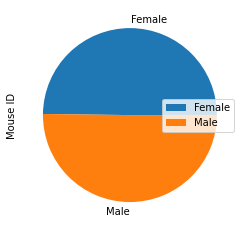

In [502]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

groupby_sex = unique_MouseID.groupby("Sex").count()
groupby_sex.plot(y='Mouse ID', kind='pie')
plt.legend(loc="right")

Text(0.5, 1.0, 'Female vs. Male Mice (PLT)')

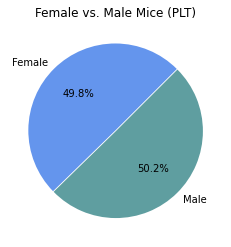

In [503]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

female_mice = len(unique_MouseID[unique_MouseID["Sex"] == "Female"])
male_mice = len(unique_MouseID[unique_MouseID["Sex"] == "Male"])

labels = ["Female", "Male"]
sizes = [female_mice, male_mice]
colors = ["cornflowerblue", "cadetblue"]
explode=(0.01, 0)
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct="%1.1f%%", startangle=45)
plt.title("Female vs. Male Mice (PLT)")

## Quartiles, Outliers and Boxplots

In [454]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
max_tumor = cleaned_mouse_study.groupby(["Mouse ID"])['Timepoint'].max()
max_tumor = max_tumor.reset_index()
max_tumor
merged_data = max_tumor.merge(cleaned_mouse_study, on=['Mouse ID', 'Timepoint'], how="left")

only_top_drugs = cleaned_mouse_study[(cleaned_mouse_study["Drug Regimen"] == "Capomulin") |
                                    (cleaned_mouse_study["Drug Regimen"] == "Ramicane") |
                                    (cleaned_mouse_study["Drug Regimen"] == "Infubinol") |
                                    (cleaned_mouse_study["Drug Regimen"] == "Ceftamin")]
only_top_drugs_groupby = only_top_drugs.groupby(["Drug Regimen"]).max()[["Tumor Volume (mm3)", "Timepoint"]]
only_top_drugs_groupby

,Tumor Volume (mm3),Timepoint
Drug Regimen,,
Capomulin,48.158209,45
Ceftamin,68.923185,45
Infubinol,72.226731,45
Ramicane,47.622816,45


In [472]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = []

for treatments in only_top_drugs["Drug Regimen"].unique():
    treatment_list.append(treatments)

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

quartiles = only_top_drugs_groupby["Tumor Volume (mm3)".quantile([.25, .5, .75])

SyntaxError: unexpected EOF while parsing (<ipython-input-472-6f7bc8261217>, line 12)

In [521]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
 
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol = []

for treatment in treatment_list:
    final_vol = merged_data.loc[merged_data["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 
    tumor_vol.append(final_vol)

    quartiles = final_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)    
    outliers = final_vol.loc[(final_vol <= lower_bound) | (final_vol >= upper_bound)].count()
    print(f"{treatment}'s number of outlier {outliers}")
    

Capomulin's number of outlier 0
Ramicane's number of outlier 0
Infubinol's number of outlier 1
Ceftamin's number of outlier 0


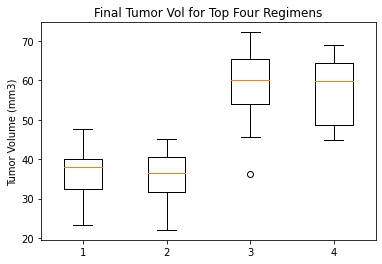

In [523]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Vol for Top Four Regimens')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_vol)
plt.show()

## Line and Scatter Plots

In [448]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
only_top_drugs["Drug Regimen"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
